# Dhruval Bhatt
### MACS 30000, Dr. Evans
### Assignment 3


In [98]:
# Import initial packages
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

# Part 1

The paper, Simulation in Sociology, by Sabrina Moretti reviews different computational research methods such as multiagent systems, cellular automata and genetic algorithms. She postulates that of the languages to express theories in social science, computational language is a happy median in between natural language that can be vague and mathematical language that is not suitable for some non-linear phenomenon. Using simulation can help understand structures of different complex systems and effects of variation. However, a good computational implementation needs to be an accurate representation of the real world. This is the validity of a model. While discussing the different type of computational modeling approaches, the author discusses the limitation of each. 

A multiagent system analysis is useful understanding and controlling networked behavior by using or defining the characteristics of individuals. As the author notes, it is an important tool in addressing the social behavior research. The key point is the individual and proposed theory of interaction. Incorrect understanding of individual's characteristics or incorrect theory could lead to misleading ideas. On the other hand, cellular automata's limitations in regard to validity. Cellular Automata can be described as a kind of multiagent system in which the agents have a specific and determined position in a lattice and are homogeneous in their behavior and in their modality of interaction. This model updates synchronously to start revealing patterns in overall structure. However, while considering social phenomenon such as public opinion, it is invalid to assume that all people transition to a different state at the same time. Another deviation from real world would be that in the model each individual interacts with only a subset of the population not the whole set. It is not always the case in real world that an individual only interacts with neighbors or predefined subset. However, these concerns can be addressed, and each method should be carefully applied to align with the representation of the real world.  

The key characteristic and an advantage of modeling using computational simulation is cases of dynamic feedback.  Dynamic feedback is when some initial stimulus changes behavior and then that change creates a new stimulus which causes further behavioral change. The author discusses the property of emergence, that is, the system self organizes till a point of equilibrium is reached. She states that this process of self-organizing gives rise to system properties that are not dependent on individual properties. Simulation and modeling can be very useful to understand complex systems. One of example she mentions is Doran et al. (1994) who use the simulative experiments to discover the circumstances that influence the formation of hierarchies in a social group. 

This phenomenon of circular feedback can be seen in many fields especially in that of social science. For instance, in political science, an important question being researched is voter participation and government lead policy changes. While theoretically it is agreed that as more people vote a certain way on a given matter, change is implemented as that stance. Many people feel discouraged to vote as they never see any actual change. However, it can also be said that no real change occurs because people do not participate in the democratic process and vote. The research question does voter participation facilitate good policy changes or do good policy changes encourage higher voter participation explores the characteristic of dynamic feedback. A well - constructed computational model can explore many different scenarios to help find insight into voting behavior of people.  
The increase in computational tools and research in new methods holds a promising future for the use of computer simulation in sociology and many of us would agree with the author’s enthusiasm to use them in social science research. 

References

Moretti, Sabrina, “Computer Simulation in Sociology: What Contribution?," Social Science Computer Review, Spring 2002, 20 (1), 43-57.


# Part 2a

In [112]:
def income_sim(p):
    
    """
    Requires a simulation profile, p, structured as a dictionary
    
    p = {
        'inc0'      : 80000,      # starting income
        'g'         : 0.025,      # long run annual growth rate
        'st_year'   : int(2020),  # start year
        'wk_years'  : 40,         # years to work
        'num_draws' : 10000,      # simulations
        'sigma'     : 0.13,       # standard deviation
        'm'         : 0,          # mean
        'rho'       : 0.4         # persistence
    }
    """    
    #set random seed
    np.random.seed(524)
    
    normal_errors = []
    #Error term is normally distributed
    normal_errors = np.random.normal(p['m'], p['sigma'], size = (p['wk_years'],p['num_draws']))
    
    #create a matrix of dim (wk_years, num_draws)
    ln_inc_mat = np.zeros((p['wk_years'], p['num_draws']))
    
    #fill the matrix for the initial value
    ln_inc_mat[0, :] = np.log(p['inc0']) + normal_errors[0, :]
   
    #loop and apply model
    
    for yr in range(1, p['wk_years']):
        ln_inc_mat[yr, :] = (1 - p['rho'])*(np.log(p['inc0']) + p['g'] * (yr)) + \
        (p['rho'] * ln_inc_mat[yr - 1, :]) + normal_errors[yr, :]
    
    income_mat = np.exp(ln_inc_mat) #dealing with large numbers so put in terms of 10k's
    
    return income_mat
    


In [113]:
simulation_profile = {
    'inc0'      : 80000,
    'g'         : 0.025,
    'rho'       : 0.4,
    'st_year'   : int(2020),
    'wk_years'  : 40,
    'sigma'     : 0.13,
    'm'         : 0, 
    'num_draws' : 10000
}

income_mat = income_sim(simulation_profile)

Plot of one lifetime income path from 2020 to 2059

Text(0,0.5,'Annual Income (\\$)')

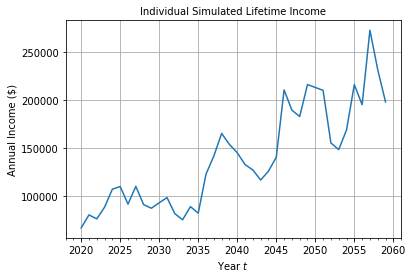

In [114]:
%matplotlib inline
p = simulation_profile
year_vec = np.arange(p['st_year'], p['st_year'] + p['wk_years'])
individual = 0
fig, ax = plt.subplots()
plt.plot(year_vec, income_mat[:,individual])

minorLocator = MultipleLocator(1)
ax.xaxis.set_minor_locator(minorLocator)
plt.grid(b=True, which='major', color='0.65', linestyle='-')
plt.title('Individual Simulated Lifetime Income', fontsize=10)
plt.xlabel(r'Year $t$')
plt.ylabel(r'Annual Income (\$)')

# Part 2b

Histogram of initial income is shown below

Text(0.5,1,'Distribution of Initial Income')

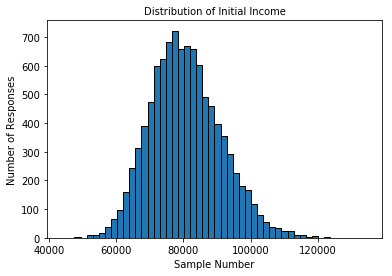

In [115]:
plt.hist(income_mat[0,:], bins = 50, ec = 'black')
plt.xlabel("Sample Number")
plt.ylabel("Number of Responses")
minorLocator = MultipleLocator(1)
ax.xaxis.set_minor_locator(minorLocator)
plt.title('Distribution of Initial Income', fontsize = 10)

Percent of the class that will earn more than $100,000 in the first year out of the program

In [116]:
count_hundred = 0 
count_seventy = 0

for i in range(len(income_mat[0,:])):
    if income_mat[0, i] > 100000:
        count_hundred = count_hundred + 1
    elif income_mat[0, i] < 70000:
        count_seventy = count_seventy + 1 

tot = len(income_mat[0,:])

print("The percent of class making more than 100000 is:", count_hundred/tot*100)
print("The percent of class making less than 70000 is :", round(count_seventy/tot*100,2))

The percent of class making more than 100000 is: 4.17
The percent of class making less than 70000 is : 15.12


The distribution is approximately normal as it is symmterical and bell curve shaped. However, the slightly elongated tail on the right is like a log normal plot. 

# Part 2c

Histogram of how many years to pay off $95000, zero interest debt using 10 percent of annual salary

In [117]:
debt_tot = 95000
sim = simulation_profile['num_draws']
years = []

for j in range(sim):
    debt = debt_tot #initial debt
    yearpp = 0     #counter to count # of years for each
    for i in range(len(income_mat[0,:])):
        payment = 10/100 * income_mat[i][j]
        debt = debt - payment
        yearpp = yearpp + 1
        if debt <= 0:
            years.append(yearpp)
            break        

Text(0.5,1,'Distribution of Years to Pay Off Debt, Starting Income $80k')

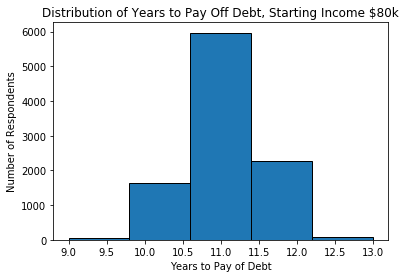

In [118]:
plt.hist(years, bins=5, ec = 'black')
plt.xlabel("Years to Pay of Debt")
plt.ylabel("Number of Respondents")
plt.title('Distribution of Years to Pay Off Debt, Starting Income $80k')

Percent of simulations where the loan is paid off in 10 years 

In [120]:
#Find the number of simulations where the loan in paid off in 10 years.
count_years = 0 

for i in range(len(years[:])):
    if years[i] <= 10:
        count_years = count_years + 1

tot = len(years)

print("The percent of class making more than 100000 is:", count_years/tot*100)

The percent of class making more than 100000 is: 16.78


# Part 2d

The starting income changes to 90000 and standard deviation changes to 0.17. New histogram of how many years it takes to pay off 95000 and what percent of the simulations are able to do so in less than 10 years. 

In [121]:
updated_income = {
    'inc0'      : 90000,
    'g'         : 0.025,
    'rho'       : 0.4,
    'st_year'   : int(2020),
    'wk_years'  : 40,
    'sigma'     : 0.17,
    'm'         : 0, 
    'num_draws' : 10000
}

income_mat_new = income_sim(updated_income)

In [122]:
debt_tot = 95000
sim = simulation_profile['num_draws']
years = []

for j in range(sim):
    debt = debt_tot #initial debt
    yearpp = 0     #counter to count # of years for each
    for i in range(len(income_mat_new[0,:])):
        payment = 10/100 * income_mat_new[i][j]
        debt = debt - payment
        yearpp = yearpp + 1
        if debt <= 0:
            years.append(yearpp)
            break

Text(0.5,1,'Distribution of Years to Pay Off Debt. Starting Income $90k')

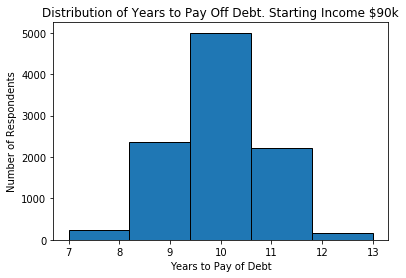

In [123]:
plt.hist(years, bins=5, ec = 'black')
plt.xlabel("Years to Pay of Debt")
plt.ylabel("Number of Respondents")
plt.title('Distribution of Years to Pay Off Debt. Starting Income $90k')

In [124]:
#Find the number of simulations where the loan in paid off in 10 years.
count_years = 0 

for i in range(len(years[:])):
    if years[i] <= 10:
        count_years = count_years + 1

tot = len(years)

print("The percent of class making more than 100000 is:", count_years/tot*100)

The percent of class making more than 100000 is: 76.02
